In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [114]:
train1 = pd.read_csv('trainInput1.csv',header=None)
train2 = pd.read_csv('trainInput2.csv',header=None)
train3 = pd.read_csv('trainInput3.csv',header=None)
train4 = pd.read_csv('trainInput4.csv',header=None)
train5 = pd.read_csv('trainInput5.csv',header=None)
train6 = pd.read_csv('trainInput6.csv',header=None)
train7 = pd.read_csv('trainInput7.csv',header=None)
train8 = pd.read_csv('trainInput8.csv',header=None)
train9 = pd.read_csv('trainInput9.csv',header=None)
train10 = pd.read_csv('trainInput10.csv',header=None)
target1 = pd.read_csv('trainTarget1.csv',header=None)
target2 = pd.read_csv('trainTarget2.csv',header=None)
target3 = pd.read_csv('trainTarget3.csv',header=None)
target4 = pd.read_csv('trainTarget4.csv',header=None)
target5 = pd.read_csv('trainTarget5.csv',header=None)
target6 = pd.read_csv('trainTarget6.csv',header=None)
target7 = pd.read_csv('trainTarget7.csv',header=None)
target8 = pd.read_csv('trainTarget8.csv',header=None)
target9 = pd.read_csv('trainTarget9.csv',header=None)
target10 = pd.read_csv('trainTarget10.csv',header=None)
train=[train1,train2,train3,train4,train5,train6,train7,train8,train9,train10]
target=[target1,target2,target3,target4,target5,target6,target7,target8,target9,target10]

In [107]:
test = pd.read_csv('testInput.csv',header=None)
test=np.asarray(test)
test_target = pd.read_csv('testTarget.csv',header=None)
test_target=np.asarray(test_target)

In [99]:
def identity(a,b):
    return np.dot(a,b)

def guassian(a,b,sigma):
     return np.exp((-(np.linalg.norm(a-b)**2))/(2*sigma**2))
    
def polynomial(a,b,degree):
    return (np.dot(a,b)+1)**degree

In [100]:
def cal_k1(a):
    row,col=a.shape
    k_matrix=np.dot(a,a.T)
    b=np.linalg.inv(k_matrix + np.identity(row))
    return (b)

In [101]:
def get_predict1(x,X,Y,y):

    t1= identity(x,X.T)
    t2=cal_k1(X)
    predict=np.dot(np.dot(t1,t2),Y)
    
    err = np.dot(np.transpose(predict-y), (predict-y))/len(predict)
    
    return (err)

In [102]:
def cal_k2(a,b,sigma):
    row1,col1=a.shape
    row2,col2=b.shape
    k_matrix=np.zeros(shape=(row1,row2))
    x1=np.asarray(a)
    x2=np.asarray(b)
    i=0
    for x11 in x1:
        j=0
        for x21 in x2:
            k_matrix[i][j] = guassian(x11,x21,sigma)
            j+=1
        i+=1
    #b=np.linalg.inv(k_matrix + np.identity(row))   
    return (k_matrix)

In [127]:
def get_predict2(x,X,Y,y,sigma):
    
    
    t1= cal_k2(x,X,sigma)
    K=cal_k2(X,X,sigma)
    nrow,ncol=K.shape
    t2=np.linalg.inv(K + np.identity(nrow))   
    predict=np.dot(np.dot(t1,t2),Y)
    
    err = np.dot(np.transpose(predict-y), (predict-y))/len(predict)
    
    return (err)

In [104]:
def cal_k3(a,degree):
    row,col=a.shape
    k_matrix=polynomial(a,a.T,degree)
    b=np.linalg.inv(k_matrix + np.identity(row))      
    return (b)

In [141]:
def get_predict3(x,X,Y,y,degree):

    t1= polynomial(x,X.T,degree)
    t2=cal_k3(X,degree)
    predict=np.dot(np.dot(t1,t2),Y)
    
    err = np.dot(np.transpose(predict-y), (predict-y))/len(predict)
    
    return (err)

In [120]:
def q3_1():
    x=np.concatenate((train[0],train[1],train[2],train[3],train[4],train[5],train[6],train[7],train[8],train[9]),axis=0)
    y=np.concatenate((target[0],target[1],target[2],target[3],target[4],target[5],target[6],target[7],target[8],target[9]),axis=0)
    
    result=get_predict1(test,x,y,test_target)
    return result

In [121]:
an1=q3_1()

In [122]:
an1

array([[3.59062069]])

In [128]:
def error_two(sigma):
    error = 0
    e=[]
    for i in range(10):
        err=0
        valset = np.array(train[i])
        target_val = np.array(targets[i])
        
        trainset=train[:i]+train[i+1:]
        targets_train=target[:i]+target[i+1:]
        
        x=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        y=np.concatenate((targets_train[0],targets_train[1],targets_train[2],targets_train[3],targets_train[4],targets_train[5],targets_train[6],targets_train[7],targets_train[8]),axis=0)
        
        st=time.time()
        err=get_predict2(valset,x,y,target_val,sigma)
        
        error+=err
    
    avg=error/10
    return (avg)


In [176]:
def q3_2():
    error=[]
    t=[]
    for i in range(1,7,1):
        start=time.time()
        re=error_two(i)
        end=time.time()
        error.append(re)
        t.append(end-start)
    return (error,t)

In [177]:
an2=q3_2()

In [178]:
an2[1]

[0.03587079048156738,
 0.03248715400695801,
 0.030263185501098633,
 0.03156781196594238,
 0.02753615379333496,
 0.026665925979614258]

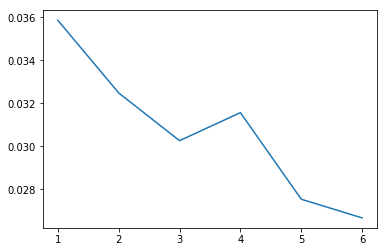

In [179]:
plt.plot(x,an2[1])

In [173]:
an2[0]

array([[0.55858866]])

In [148]:
x=np.arange(1, 7, 1)
yy1=[]
for i in range(len(an2[0])):
    yy1.append(an2[0][i].item())

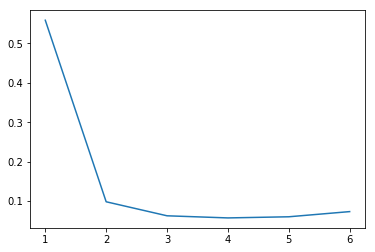

In [150]:
plt.plot(x,yy1)

In [157]:
def q3_error(sigma):
    xx=np.concatenate((train[0],train[1],train[2],train[3],train[4],train[5],train[6],train[7],train[8],train[9]),axis=0)
    yy=np.concatenate((target[0],target[1],target[2],target[3],target[4],target[5],target[6],target[7],target[8],target[9]),axis=0)
    
    result=get_predict2(test, xx,yy, test_target,sigma)
    return (result)

In [158]:
error_gau=q3_error(4)

In [159]:
error_gau

array([[0.04302516]])

In [142]:
def error_three(degree):
    error = 0
    e=[]
    for i in range(10):
        err=0
        valset = np.array(train[i])
        target_val = np.array(targets[i])
        
        trainset=train[:i]+train[i+1:]
        targets_train=target[:i]+target[i+1:]
        
        x=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        y=np.concatenate((targets_train[0],targets_train[1],targets_train[2],targets_train[3],targets_train[4],targets_train[5],targets_train[6],targets_train[7],targets_train[8]),axis=0)
        
       
        err=get_predict3(valset,x,y,target_val,degree)
       
        
        error+=err
    
    avg=error/10
    return (avg)

In [168]:
def q3_3():
    error=[]
    t=[]
    for i in range(1,5,1):
        start=time.time()
        re=error_three(i)
        end=time.time()
        error.append(re)
        t.append(end-start)
    return (error,t)

In [169]:
an3=q3_3()

In [145]:
an3[0]

[array([[1.29165089]]),
 array([[0.93364154]]),
 array([[0.06519886]]),
 array([[0.05436885]])]

In [151]:
x2=np.arange(1, 5, 1)
yy2=[]
for i in range(len(an3[0])):
    yy2.append(an3[0][i].item())

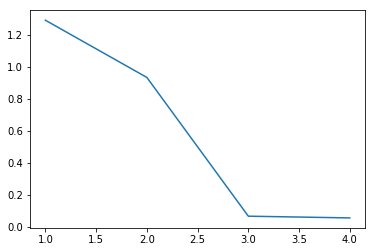

In [152]:
plt.plot(x2,yy2)

In [170]:
an3[1]

[0.04162478446960449,
 0.030818939208984375,
 0.03705286979675293,
 0.03272867202758789]

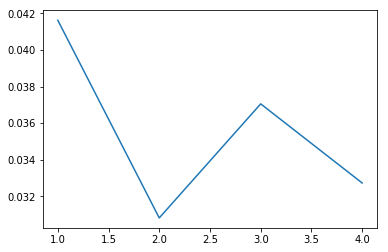

In [180]:
plt.plot(x2,an3[1])

In [163]:
def q3_perror(degree):
    xx=np.concatenate((train[0],train[1],train[2],train[3],train[4],train[5],train[6],train[7],train[8],train[9]),axis=0)
    yy=np.concatenate((target[0],target[1],target[2],target[3],target[4],target[5],target[6],target[7],target[8],target[9]),axis=0)
    
    result=get_predict3(test, xx,yy, test_target,4)
    return (result)

In [164]:
error_pol=q3_perror(4)

In [165]:
error_pol

array([[0.04576615]])